In [1]:
from random import randint
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dir_path = os.path.join(os.getcwd(), './CMAPSSData')
print(os.listdir(dir_path))

['Damage Propagation Modeling.pdf', 'readme.txt', 'RUL_FD001.txt', 'RUL_FD002.txt', 'RUL_FD003.txt', 'RUL_FD004.txt', 'test_FD001.txt', 'test_FD002.txt', 'test_FD003.txt', 'test_FD004.txt', 'train_FD001.txt', 'train_FD002.txt', 'train_FD003.txt', 'train_FD004.txt']


In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
index_names = ['unit_nr', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i) for i in range(1,22)] 
col_names = index_names + setting_names + sensor_names

In [5]:
train = pd.read_csv((dir_path+'/train_FD001.txt'), sep='\s+', header=None, names=col_names)
test = pd.read_csv((dir_path+'/test_FD001.txt'), sep='\s+', header=None, names=col_names)
y_test = pd.read_csv((dir_path+'/RUL_FD001.txt'), sep='\s+', header=None, names=['RUL'])

In [6]:
train

unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0            1            1    -0.0007    -0.0004      100.0  518.67  641.82   
1            1            2     0.0019    -0.0003      100.0  518.67  642.15   
2            1            3    -0.0043     0.0003      100.0  518.67  642.35   
3            1            4     0.0007     0.0000      100.0  518.67  642.35   
4            1            5    -0.0019    -0.0002      100.0  518.67  642.37   
...        ...          ...        ...        ...        ...     ...     ...   
20626      100          196    -0.0004    -0.0003      100.0  518.67  643.49   
20627      100          197    -0.0016    -0.0005      100.0  518.67  643.54   
20628      100          198     0.0004     0.0000      100.0  518.67  643.42   
20629      100          199    -0.0011     0.0003      100.0  518.67  643.23   
20630      100          200    -0.0032    -0.0005      100.0  518.67  643.85   

           s_3      s_4    s_5  ...    s_12     s_13     s_14    s_15  s_16  \
0      1589.70  1400.60  14.62  ...  521.66  2388.02  8138.62  8.4195  0.03   
1      1591.82  1403.14  14.62  ...  522.28  2388.07  8131.49  8.4318  0.03   
2      1587.99  1404.20  14.62  ...  522.42  2388.03  8133.23  8.4178  0.03   
3      1582.79  1401.87  14.62  ...  522.86  2388.08  8133.83  8.3682  0.03   
4      1582.85  1406.22  14.62  ...  522.19  2388.04  8133.80  8.4294  0.03   
...        ...      ...    ...  ...     ...      ...      ...     ...   ...   
20626  1597.98  1428.63  14.62  ...  519.49  2388.26  8137.60  8.4956  0.03   
20627  1604.50  1433.58  14.62  ...  519.68  2388.22  8136.50  8.5139  0.03   
20628  1602.46  1428.18  14.62  ...  520.01  2388.24  8141.05  8.5646  0.03   
20629  1605.26  1426.53  14.62  ...  519.67  2388.23  8139.29  8.5389  0.03   
20630  1600.38  1432.14  14.62  ...  519.30  2388.26  8137.33  8.5036  0.03   

       s_17  s_18   s_19   s_20     s_21  
0       392  2388  100.0  39.06  23.4190  
1       392  2388  100.0  39.00  23.4236  
2       390  2388  100.0  38.95  23.3442  
3       392  2388  100.0  38.88  23.3739  
4       393  2388  100.0  38.90  23.4044  
...     ...   ...    ...    ...      ...  
20626   397  2388  100.0  38.49  22.9735  
20627   395  2388  100.0  38.30  23.1594  
20628   398  2388  100.0  38.44  22.9333  
20629   395  2388  100.0  38.29  23.0640  
20630   396  2388  100.0  38.37  23.0522  

[20631 rows x 26 columns]

In [7]:
train[index_names].describe()

unit_nr   time_cycles
count  20631.000000  20631.000000
mean      51.506568    108.807862
std       29.227633     68.880990
min        1.000000      1.000000
25%       26.000000     52.000000
50%       52.000000    104.000000
75%       77.000000    156.000000
max      100.000000    362.000000

According to the data, it is seen that the dataset contains simulations on 100 turbofan engines. 

In [8]:
train[index_names].groupby('unit_nr').max().describe()

time_cycles
count   100.000000
mean    206.310000
std      46.342749
min     128.000000
25%     177.000000
50%     199.000000
75%     229.250000
max     362.000000

When inspecting the max time_cycles you can see the engine which failed the earliest did so after 128 cycles, whereas the engine which operated the longest broke down after 362 cycles. The average engine breaks between 199 and 206 cycles, however the standard deviation of 46 cycles is rather big. The standard deviation means the space of failure between any two different engines.

In [9]:
train[setting_names].describe()

setting_1     setting_2  setting_3
count  20631.000000  20631.000000    20631.0
mean      -0.000009      0.000002      100.0
std        0.002187      0.000293        0.0
min       -0.008700     -0.000600      100.0
25%       -0.001500     -0.000200      100.0
50%        0.000000      0.000000      100.0
75%        0.001500      0.000300      100.0
max        0.008700      0.000600      100.0

In [10]:
train[sensor_names].describe().transpose()

count         mean           std        min        25%        50%  \
s_1   20631.0   518.670000  6.537152e-11   518.6700   518.6700   518.6700   
s_2   20631.0   642.680934  5.000533e-01   641.2100   642.3250   642.6400   
s_3   20631.0  1590.523119  6.131150e+00  1571.0400  1586.2600  1590.1000   
s_4   20631.0  1408.933782  9.000605e+00  1382.2500  1402.3600  1408.0400   
s_5   20631.0    14.620000  3.394700e-12    14.6200    14.6200    14.6200   
s_6   20631.0    21.609803  1.388985e-03    21.6000    21.6100    21.6100   
s_7   20631.0   553.367711  8.850923e-01   549.8500   552.8100   553.4400   
s_8   20631.0  2388.096652  7.098548e-02  2387.9000  2388.0500  2388.0900   
s_9   20631.0  9065.242941  2.208288e+01  9021.7300  9053.1000  9060.6600   
s_10  20631.0     1.300000  4.660829e-13     1.3000     1.3000     1.3000   
s_11  20631.0    47.541168  2.670874e-01    46.8500    47.3500    47.5100   
s_12  20631.0   521.413470  7.375534e-01   518.6900   520.9600   521.4800   
s_13  20631.0  2388.096152  7.191892e-02  2387.8800  2388.0400  2388.0900   
s_14  20631.0  8143.752722  1.907618e+01  8099.9400  8133.2450  8140.5400   
s_15  20631.0     8.442146  3.750504e-02     8.3249     8.4149     8.4389   
s_16  20631.0     0.030000  1.556432e-14     0.0300     0.0300     0.0300   
s_17  20631.0   393.210654  1.548763e+00   388.0000   392.0000   393.0000   
s_18  20631.0  2388.000000  0.000000e+00  2388.0000  2388.0000  2388.0000   
s_19  20631.0   100.000000  0.000000e+00   100.0000   100.0000   100.0000   
s_20  20631.0    38.816271  1.807464e-01    38.1400    38.7000    38.8300   
s_21  20631.0    23.289705  1.082509e-01    22.8942    23.2218    23.2979   

            75%        max  
s_1    518.6700   518.6700  
s_2    643.0000   644.5300  
s_3   1594.3800  1616.9100  
s_4   1414.5550  1441.4900  
s_5     14.6200    14.6200  
s_6     21.6100    21.6100  
s_7    554.0100   556.0600  
s_8   2388.1400  2388.5600  
s_9   9069.4200  9244.5900  
s_10     1.3000     1.3000  
s_11    47.7000    48.5300  
s_12   521.9500   523.3800  
s_13  2388.1400  2388.5600  
s_14  8148.3100  8293.7200  
s_15     8.4656     8.5848  
s_16     0.0300     0.0300  
s_17   394.0000   400.0000  
s_18  2388.0000  2388.0000  
s_19   100.0000   100.0000  
s_20    38.9500    39.4300  
s_21    23.3668    23.6184

By looking at the standard deviation it’s clear sensors 1, 10, 18 and 19 do not fluctuate at all, these can be safely discarded as they hold no useful information. Inspecting the quantiles indicates sensors 5, 6 and 16 have little fluctuation and require further inspection. Sensors 9 and 14 have the highest fluctuation, however this does not mean the other sensors can’t hold valuable information.

Now that we understand the data distribution of our data, we can compute the RUL (Remaining Useful Life) of the engine, which will give us an insight into how the sensor changes as the engine nears breakdown, which will also serve as the target variable of our work.

However there is no set predefined way to compute the RUL for our turbofan engines one way to do that is by assuming the RUL decreases linearly over time and have a value of 0 at the last time cycle of the engine. This assumption implies RUL would be 10 at 10 cycles before breakdown, 50 at 50 cycles before breakdown, etc.

In [11]:
grouped_by_unit = train.groupby(by="unit_nr")
max_cycle = grouped_by_unit["time_cycles"].max()
    
    # Merge the max cycle back into the original frame
result_frame = train.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit_nr', right_index=True)
    
    # Calculate remaining useful life for each row
remaining_useful_life = result_frame["max_cycle"] - result_frame["time_cycles"]
result_frame["RUL"] = remaining_useful_life

In [12]:
result_frame = result_frame.drop("max_cycle", axis=1)

In [13]:
result_frame

unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0            1            1    -0.0007    -0.0004      100.0  518.67  641.82   
1            1            2     0.0019    -0.0003      100.0  518.67  642.15   
2            1            3    -0.0043     0.0003      100.0  518.67  642.35   
3            1            4     0.0007     0.0000      100.0  518.67  642.35   
4            1            5    -0.0019    -0.0002      100.0  518.67  642.37   
...        ...          ...        ...        ...        ...     ...     ...   
20626      100          196    -0.0004    -0.0003      100.0  518.67  643.49   
20627      100          197    -0.0016    -0.0005      100.0  518.67  643.54   
20628      100          198     0.0004     0.0000      100.0  518.67  643.42   
20629      100          199    -0.0011     0.0003      100.0  518.67  643.23   
20630      100          200    -0.0032    -0.0005      100.0  518.67  643.85   

           s_3      s_4    s_5  ...     s_13     s_14    s_15  s_16  s_17  \
0      1589.70  1400.60  14.62  ...  2388.02  8138.62  8.4195  0.03   392   
1      1591.82  1403.14  14.62  ...  2388.07  8131.49  8.4318  0.03   392   
2      1587.99  1404.20  14.62  ...  2388.03  8133.23  8.4178  0.03   390   
3      1582.79  1401.87  14.62  ...  2388.08  8133.83  8.3682  0.03   392   
4      1582.85  1406.22  14.62  ...  2388.04  8133.80  8.4294  0.03   393   
...        ...      ...    ...  ...      ...      ...     ...   ...   ...   
20626  1597.98  1428.63  14.62  ...  2388.26  8137.60  8.4956  0.03   397   
20627  1604.50  1433.58  14.62  ...  2388.22  8136.50  8.5139  0.03   395   
20628  1602.46  1428.18  14.62  ...  2388.24  8141.05  8.5646  0.03   398   
20629  1605.26  1426.53  14.62  ...  2388.23  8139.29  8.5389  0.03   395   
20630  1600.38  1432.14  14.62  ...  2388.26  8137.33  8.5036  0.03   396   

       s_18   s_19   s_20     s_21  RUL  
0      2388  100.0  39.06  23.4190  191  
1      2388  100.0  39.00  23.4236  190  
2      2388  100.0  38.95  23.3442  189  
3      2388  100.0  38.88  23.3739  188  
4      2388  100.0  38.90  23.4044  187  
...     ...    ...    ...      ...  ...  
20626  2388  100.0  38.49  22.9735    4  
20627  2388  100.0  38.30  23.1594    3  
20628  2388  100.0  38.44  22.9333    2  
20629  2388  100.0  38.29  23.0640    1  
20630  2388  100.0  38.37  23.0522    0  

[20631 rows x 27 columns]

In [14]:
train = result_frame.copy()

In [15]:
train[index_names+['RUL']].head()

unit_nr  time_cycles  RUL
0        1            1  191
1        1            2  190
2        1            3  189
3        1            4  188
4        1            5  187

In [16]:
dataset_description = train.describe()
print(dataset_description)

            unit_nr   time_cycles     setting_1     setting_2  setting_3  \
count  20631.000000  20631.000000  20631.000000  20631.000000    20631.0   
mean      51.506568    108.807862     -0.000009      0.000002      100.0   
std       29.227633     68.880990      0.002187      0.000293        0.0   
min        1.000000      1.000000     -0.008700     -0.000600      100.0   
25%       26.000000     52.000000     -0.001500     -0.000200      100.0   
50%       52.000000    104.000000      0.000000      0.000000      100.0   
75%       77.000000    156.000000      0.001500      0.000300      100.0   
max      100.000000    362.000000      0.008700      0.000600      100.0   

                s_1           s_2           s_3           s_4           s_5  \
count  2.063100e+04  20631.000000  20631.000000  20631.000000  2.063100e+04   
mean   5.186700e+02    642.680934   1590.523119   1408.933782  1.462000e+01   
std    6.537152e-11      0.500053      6.131150      9.000605  3.394700e-12   

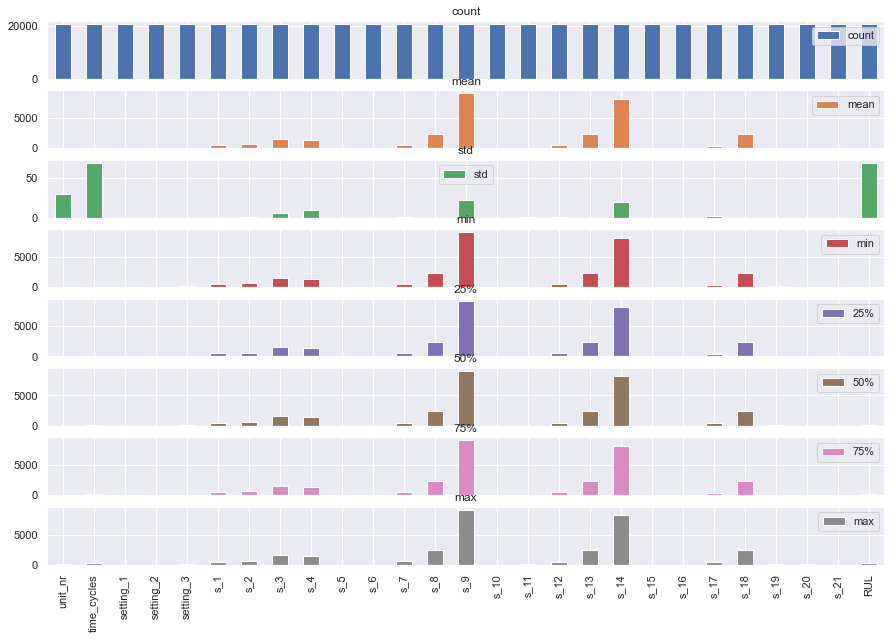

In [17]:
axes = dataset_description.T.plot.bar(subplots=True, figsize=(15,10))

In [18]:
data_corr = train.corr()
data_corr['RUL'].sort_values(ascending=False)

RUL            1.000000e+00
s_12           6.719831e-01
s_7            6.572227e-01
s_21           6.356620e-01
s_20           6.294285e-01
unit_nr        7.875253e-02
s_5            1.561885e-14
s_1            1.535649e-14
s_10           1.414118e-14
s_16          -3.799205e-15
setting_2     -1.947628e-03
setting_1     -3.198458e-03
s_6           -1.283484e-01
s_14          -3.067689e-01
s_9           -3.901016e-01
s_13          -5.625688e-01
s_8           -5.639684e-01
s_3           -5.845204e-01
s_17          -6.061536e-01
s_2           -6.064840e-01
s_15          -6.426670e-01
s_4           -6.789482e-01
s_11          -6.962281e-01
time_cycles   -7.362406e-01
setting_3               NaN
s_18                    NaN
s_19                    NaN
Name: RUL, dtype: float64

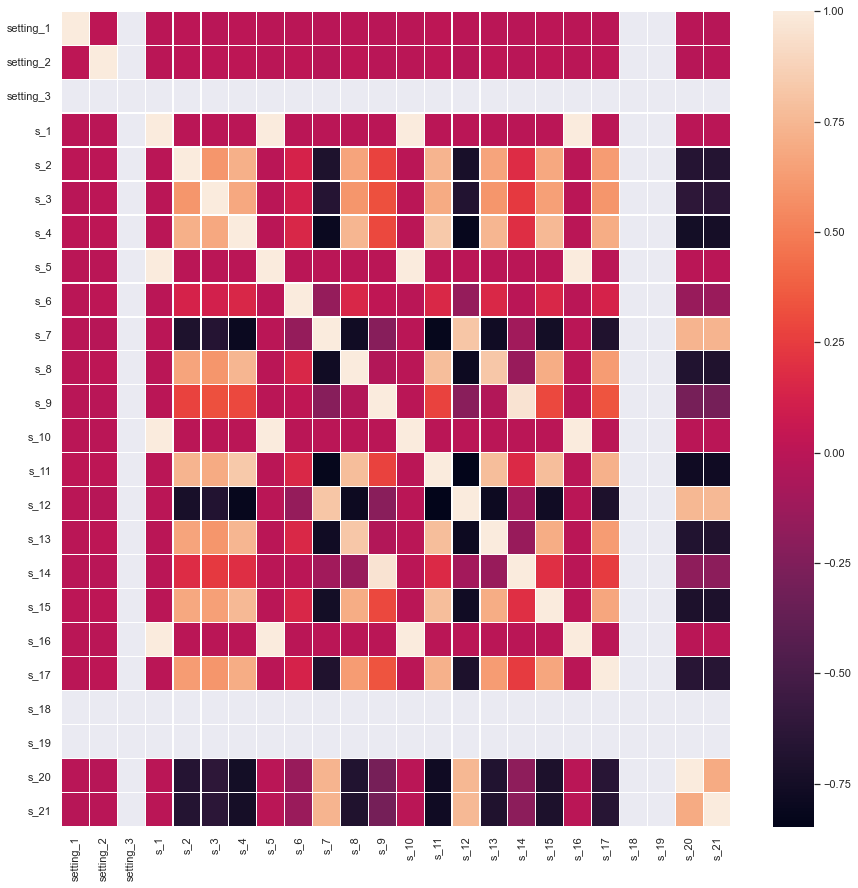

In [19]:
df_plot = train.copy()[setting_names + sensor_names]
df_corr = df_plot.corr(method='pearson')
fig, ax = plt.subplots(figsize=(15,15))
axes = sns.heatmap(df_corr, linewidths=.2, )

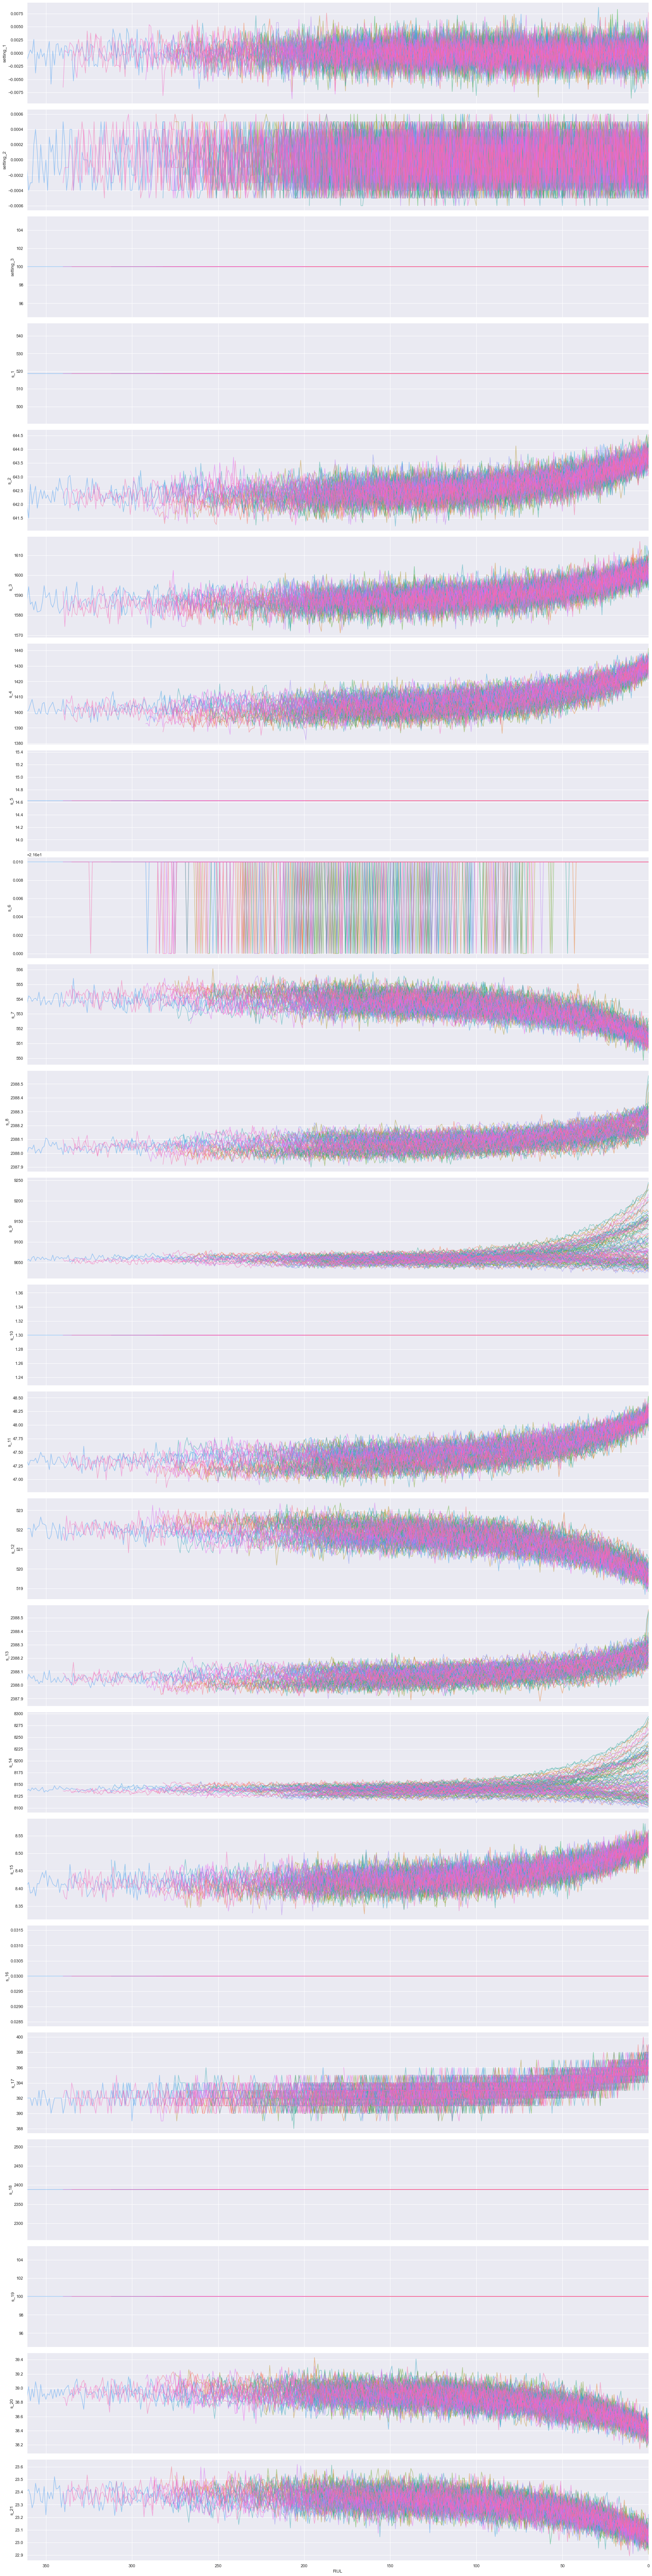

In [20]:
df_plot = train.copy()
df_plot = df_plot.sort_values(index_names)
graph = sns.PairGrid(data=df_plot, x_vars="RUL", y_vars=setting_names + sensor_names, hue="unit_nr", height=4, aspect=6,)
graph = graph.map(plt.plot, alpha=0.5)
graph = graph.set(xlim=(df_plot['RUL'].max(),df_plot['RUL'].min()))
# graph = graph.add_legend()

In [21]:
def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    return '{} set RMSE:{}, R2:{}'.format(label, rmse, variance)

In [22]:
drop_sensors = ['s_1','s_5','s_6','s_10','s_16','s_18','s_19']
drop_labels = index_names+setting_names+drop_sensors
X_train = train.drop(drop_labels, axis=1)
y_train = X_train.pop('RUL')

In [23]:
test

unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0            1            1     0.0023     0.0003      100.0  518.67  643.02   
1            1            2    -0.0027    -0.0003      100.0  518.67  641.71   
2            1            3     0.0003     0.0001      100.0  518.67  642.46   
3            1            4     0.0042     0.0000      100.0  518.67  642.44   
4            1            5     0.0014     0.0000      100.0  518.67  642.51   
...        ...          ...        ...        ...        ...     ...     ...   
13091      100          194     0.0049     0.0000      100.0  518.67  643.24   
13092      100          195    -0.0011    -0.0001      100.0  518.67  643.22   
13093      100          196    -0.0006    -0.0003      100.0  518.67  643.44   
13094      100          197    -0.0038     0.0001      100.0  518.67  643.26   
13095      100          198     0.0013     0.0003      100.0  518.67  642.95   

           s_3      s_4    s_5  ...    s_12     s_13     s_14    s_15  s_16  \
0      1585.29  1398.21  14.62  ...  521.72  2388.03  8125.55  8.4052  0.03   
1      1588.45  1395.42  14.62  ...  522.16  2388.06  8139.62  8.3803  0.03   
2      1586.94  1401.34  14.62  ...  521.97  2388.03  8130.10  8.4441  0.03   
3      1584.12  1406.42  14.62  ...  521.38  2388.05  8132.90  8.3917  0.03   
4      1587.19  1401.92  14.62  ...  522.15  2388.03  8129.54  8.4031  0.03   
...        ...      ...    ...  ...     ...      ...      ...     ...   ...   
13091  1599.45  1415.79  14.62  ...  520.69  2388.00  8213.28  8.4715  0.03   
13092  1595.69  1422.05  14.62  ...  521.05  2388.09  8210.85  8.4512  0.03   
13093  1593.15  1406.82  14.62  ...  521.18  2388.04  8217.24  8.4569  0.03   
13094  1594.99  1419.36  14.62  ...  521.33  2388.08  8220.48  8.4711  0.03   
13095  1601.62  1424.99  14.62  ...  521.07  2388.05  8214.64  8.4903  0.03   

       s_17  s_18   s_19   s_20     s_21  
0       392  2388  100.0  38.86  23.3735  
1       393  2388  100.0  39.02  23.3916  
2       393  2388  100.0  39.08  23.4166  
3       391  2388  100.0  39.00  23.3737  
4       390  2388  100.0  38.99  23.4130  
...     ...   ...    ...    ...      ...  
13091   394  2388  100.0  38.65  23.1974  
13092   395  2388  100.0  38.57  23.2771  
13093   395  2388  100.0  38.62  23.2051  
13094   395  2388  100.0  38.66  23.2699  
13095   396  2388  100.0  38.70  23.1855  

[13096 rows x 26 columns]

In [24]:
X_test = test.groupby('unit_nr').last().reset_index().drop(drop_labels, axis=1)

In [25]:
X_test

s_2      s_3      s_4     s_7      s_8      s_9   s_11    s_12  \
0   642.58  1581.22  1398.91  554.42  2388.08  9056.40  47.23  521.79   
1   642.55  1586.59  1410.83  553.52  2388.10  9044.77  47.67  521.74   
2   642.88  1589.75  1418.89  552.59  2388.16  9049.26  47.88  520.83   
3   642.78  1594.53  1406.88  552.64  2388.13  9051.30  47.65  521.88   
4   642.27  1589.94  1419.36  553.29  2388.10  9053.99  47.46  521.00   
..     ...      ...      ...     ...      ...      ...    ...     ...   
95  642.30  1590.88  1397.94  553.99  2388.03  9062.41  47.14  522.30   
96  642.59  1582.96  1410.92  554.05  2388.06  9076.36  47.38  521.58   
97  642.68  1599.51  1415.47  553.44  2388.13  9062.34  47.66  521.53   
98  642.00  1585.03  1397.98  554.75  2388.01  9067.16  47.26  521.82   
99  642.95  1601.62  1424.99  552.48  2388.06  9155.03  47.80  521.07   

       s_13     s_14    s_15  s_17   s_20     s_21  
0   2388.06  8130.11  8.4024   393  38.81  23.3552  
1   2388.09  8126.90  8.4505   391  38.81  23.2618  
2   2388.14  8131.46  8.4119   395  38.93  23.2740  
3   2388.11  8133.64  8.4634   395  38.58  23.2581  
4   2388.15  8125.74  8.4362   394  38.75  23.4117  
..      ...      ...     ...   ...    ...      ...  
95  2388.01  8148.24  8.4110   391  38.96  23.4606  
96  2388.06  8155.48  8.4500   395  38.61  23.2953  
97  2388.09  8146.39  8.4235   394  38.76  23.3608  
98  2388.02  8150.38  8.4003   391  38.95  23.3595  
99  2388.05  8214.64  8.4903   396  38.70  23.1855  

[100 rows x 14 columns]

In [26]:
def model(X_train, y_train, X_test, y_test):
    from sklearn.linear_model import LinearRegression
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    train_pred_lin = lin_reg.predict(X_train)
    test_pred_lin = lin_reg.predict(X_test)
    result_train = evaluate(y_train, train_pred_lin, 'train')
    result_test = evaluate(y_train, train_pred_lin)
    
    from sklearn.tree import DecisionTreeRegressor
    dec_tree = DecisionTreeRegressor()
    dec_tree.fit(X_train, y_train)
    train_pred_dec = dec_tree.predict(X_train)
    test_pred_dec = dec_tree.predict(X_test)
    
    from sklearn.ensemble import RandomForestRegressor
    ran_forest = RandomForestRegressor()
    ran_forest.fit(X_train, y_train)
    train_pred_ran = ran_forest.predict(X_train)
    test_pred_ran = ran_forest.predict(X_test)
    
    from sklearn.svm import SVR
    svr = SVR(kernel='linear')
    svr.fit(X_train, y_train)
    train_pred_svr = svr.predict(X_train)
    test_pred_svr = svr.predict(X_test)
    
    from sklearn.linear_model import LassoCV
    lasso = LassoCV()
    lasso.fit(X_train, y_train)
    train_pred_lasso = lasso.predict(X_train)
    test_pred_lasso = lasso.predict(X_test)

    
    print('Linear Regression Results \n', evaluate(y_train, train_pred_lin, 'train'), '\n', evaluate(y_test, test_pred_lin), '\n')
    print('Decision Tree Regression Results \n', evaluate(y_train, train_pred_dec, 'train'), '\n', evaluate(y_test, test_pred_dec), '\n')
    print('Random Forest Regression Results \n', evaluate(y_train, train_pred_ran, 'train'), '\n', evaluate(y_test, test_pred_ran), '\n')
    print('Support Vector Regression Results \n', evaluate(y_train, train_pred_svr, 'train'), '\n', evaluate(y_test, test_pred_svr), '\n')
    print('Lasso Regression Results \n', evaluate(y_train, train_pred_lasso, 'train'), '\n', evaluate(y_test, test_pred_lasso), '\n')

In [27]:
model(X_train, y_train, X_test, y_test)

Linear Regression Results 
 train set RMSE:44.66819159545453, R2:0.5794486527796716 
 test set RMSE:31.952633027741815, R2:0.40877368076574083 

Decision Tree Regression Results 
 train set RMSE:0.0, R2:1.0 
 test set RMSE:52.973955865123, R2:-0.6250445314458026 

Random Forest Regression Results 
 train set RMSE:15.594548828132929, R2:0.948741261117017 
 test set RMSE:34.09941518560105, R2:0.32666015083014943 

Support Vector Regression Results 
 train set RMSE:51.335202901986634, R2:0.4445399181820472 
 test set RMSE:49.17131344722714, R2:-0.4001161790823473 

Lasso Regression Results 
 train set RMSE:45.12083979779263, R2:0.5708820944860493 
 test set RMSE:33.91124323763048, R2:0.3340710740858841 



In [28]:
#Performing some feature engineering
y_train_clipped = y_train.clip(upper=125)

In [29]:
model(X_train, y_train_clipped, X_test, y_test)

Linear Regression Results 
 train set RMSE:21.491018701515415, R2:0.7340432868050447 
 test set RMSE:21.900213406890515, R2:0.7222608196546241 

Decision Tree Regression Results 
 train set RMSE:0.0, R2:1.0 
 test set RMSE:26.745093007877163, R2:0.5857822733111984 

Random Forest Regression Results 
 train set RMSE:6.83417834528622, R2:0.9731051225976719 
 test set RMSE:18.359483298829517, R2:0.8048082918362799 

Support Vector Regression Results 
 train set RMSE:29.57783070266026, R2:0.49623314435506494 
 test set RMSE:29.675150117440094, R2:0.49005151605390174 

Lasso Regression Results 
 train set RMSE:21.958171665645366, R2:0.7223553528199214 
 test set RMSE:22.915934980676948, R2:0.6959005613170715 



In [30]:
#Scaling our dataset
# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
model(X_train_scaled, y_train_clipped, X_test_scaled, y_test)

Linear Regression Results 
 train set RMSE:21.49101870151519, R2:0.7340432868050502 
 test set RMSE:21.900213406892124, R2:0.7222608196545833 

Decision Tree Regression Results 
 train set RMSE:0.0, R2:1.0 
 test set RMSE:24.80040322252846, R2:0.6438295051346088 

Random Forest Regression Results 
 train set RMSE:6.845126245926351, R2:0.9730188859590359 
 test set RMSE:18.302356924724204, R2:0.8060210979450909 

Support Vector Regression Results 
 train set RMSE:21.578263975067888, R2:0.7318795396979632 
 test set RMSE:21.580480163289597, R2:0.730311354095216 

Lasso Regression Results 
 train set RMSE:21.491584580677923, R2:0.7340292808292821 
 test set RMSE:21.92803219122439, R2:0.7215547741535474 

